In [1]:
import pandas as pd

df = pd.read_csv('sales_data_sample.csv', encoding='ISO-8859-1')
pd.set_option('display.max_columns', None)
print(df.head())

   ORDERNUMBER  QUANTITYORDERED  PRICEEACH  ORDERLINENUMBER    SALES  \
0        10107               30      95.70                2  2871.00   
1        10121               34      81.35                5  2765.90   
2        10134               41      94.74                2  3884.34   
3        10145               45      83.26                6  3746.70   
4        10159               49     100.00               14  5205.27   

         ORDERDATE   STATUS  QTR_ID  MONTH_ID  YEAR_ID  PRODUCTLINE  MSRP  \
0   2/24/2003 0:00  Shipped       1         2     2003  Motorcycles    95   
1    5/7/2003 0:00  Shipped       2         5     2003  Motorcycles    95   
2    7/1/2003 0:00  Shipped       3         7     2003  Motorcycles    95   
3   8/25/2003 0:00  Shipped       3         8     2003  Motorcycles    95   
4  10/10/2003 0:00  Shipped       4        10     2003  Motorcycles    95   

  PRODUCTCODE              CUSTOMERNAME             PHONE  \
0    S10_1678         Land of Toys Inc.    

In [2]:
#Get an overview and numerical column summaries
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ORDERNUMBER       2823 non-null   int64  
 1   QUANTITYORDERED   2823 non-null   int64  
 2   PRICEEACH         2823 non-null   float64
 3   ORDERLINENUMBER   2823 non-null   int64  
 4   SALES             2823 non-null   float64
 5   ORDERDATE         2823 non-null   object 
 6   STATUS            2823 non-null   object 
 7   QTR_ID            2823 non-null   int64  
 8   MONTH_ID          2823 non-null   int64  
 9   YEAR_ID           2823 non-null   int64  
 10  PRODUCTLINE       2823 non-null   object 
 11  MSRP              2823 non-null   int64  
 12  PRODUCTCODE       2823 non-null   object 
 13  CUSTOMERNAME      2823 non-null   object 
 14  PHONE             2823 non-null   object 
 15  ADDRESSLINE1      2823 non-null   object 
 16  ADDRESSLINE2      302 non-null    object 


,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,QTR_ID,MONTH_ID,YEAR_ID,MSRP
count,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.00000,2823.000000
mean,10258.725115,35.092809,83.658544,6.466171,3553.889072,2.717676,7.092455,2003.81509,100.715551
std,92.085478,9.741443,20.174277,4.225841,1841.865106,1.203878,3.656633,0.69967,40.187912
min,10100.000000,6.000000,26.880000,1.000000,482.130000,1.000000,1.000000,2003.00000,33.000000
25%,10180.000000,27.000000,68.860000,3.000000,2203.430000,2.000000,4.000000,2003.00000,68.000000
50%,10262.000000,35.000000,95.700000,6.000000,3184.800000,3.000000,8.000000,2004.00000,99.000000
75%,10333.500000,43.000000,100.000000,9.000000,4508.000000,4.000000,11.000000,2004.00000,124.000000
max,10425.000000,97.000000,100.000000,18.000000,14082.800000,4.000000,12.000000,2005.00000,214.000000


In [3]:
#2. Check for missing values
print(df.isnull().sum())

ORDERNUMBER            0
QUANTITYORDERED        0
PRICEEACH              0
ORDERLINENUMBER        0
SALES                  0
ORDERDATE              0
STATUS                 0
QTR_ID                 0
MONTH_ID               0
YEAR_ID                0
PRODUCTLINE            0
MSRP                   0
PRODUCTCODE            0
CUSTOMERNAME           0
PHONE                  0
ADDRESSLINE1           0
ADDRESSLINE2        2521
CITY                   0
STATE               1486
POSTALCODE            76
COUNTRY                0
TERRITORY           1074
CONTACTLASTNAME        0
CONTACTFIRSTNAME       0
DEALSIZE               0
dtype: int64


In [4]:
# Drop columns with missing values and unnecessary columns
df = df.drop(columns=["PHONE", "ADDRESSLINE2", 'POSTALCODE', 'STATE', 'TERRITORY', 'CONTACTLASTNAME', 'CONTACTFIRSTNAME'], errors='ignore')
print (df.head())

   ORDERNUMBER  QUANTITYORDERED  PRICEEACH  ORDERLINENUMBER    SALES  \
0        10107               30      95.70                2  2871.00   
1        10121               34      81.35                5  2765.90   
2        10134               41      94.74                2  3884.34   
3        10145               45      83.26                6  3746.70   
4        10159               49     100.00               14  5205.27   

         ORDERDATE   STATUS  QTR_ID  MONTH_ID  YEAR_ID  PRODUCTLINE  MSRP  \
0   2/24/2003 0:00  Shipped       1         2     2003  Motorcycles    95   
1    5/7/2003 0:00  Shipped       2         5     2003  Motorcycles    95   
2    7/1/2003 0:00  Shipped       3         7     2003  Motorcycles    95   
3   8/25/2003 0:00  Shipped       3         8     2003  Motorcycles    95   
4  10/10/2003 0:00  Shipped       4        10     2003  Motorcycles    95   

  PRODUCTCODE              CUSTOMERNAME                   ADDRESSLINE1  \
0    S10_1678         Land of 

In [5]:
#3. Clean Data
#Check for duplicates
duplicates = df.duplicated().any()
if duplicates:
    print("Duplicate rows:")
    print(df[duplicates])
else:
    print("No duplicates found.")


No duplicates found.


In [6]:
# Check If Any NaN Values Exist
df.isna().any().any()

# This shows how many NaN values are in each column:
print(df.isna().sum())


ORDERNUMBER        0
QUANTITYORDERED    0
PRICEEACH          0
ORDERLINENUMBER    0
SALES              0
ORDERDATE          0
STATUS             0
QTR_ID             0
MONTH_ID           0
YEAR_ID            0
PRODUCTLINE        0
MSRP               0
PRODUCTCODE        0
CUSTOMERNAME       0
ADDRESSLINE1       0
CITY               0
COUNTRY            0
DEALSIZE           0
dtype: int64


In [7]:
# Detect extra spaces and remove them from strings
print("Detecting extra spaces...")
string_columns = df.select_dtypes(include='object').columns
print("Extra spaces from strings were removed:")
print(string_columns)
for column in string_columns:
    df[column] = df[column].str.strip()

Detecting extra spaces...
Extra spaces from strings were removed:
Index(['ORDERDATE', 'STATUS', 'PRODUCTLINE', 'PRODUCTCODE', 'CUSTOMERNAME',
       'ADDRESSLINE1', 'CITY', 'COUNTRY', 'DEALSIZE'],
      dtype='object')


In [8]:
#4. Convert Data Types
#Convert 'ORDERDATE' to datetime
df['ORDERDATE'] = pd.to_datetime(df['ORDERDATE'])

#Convert categorical columns to category type
df = df.astype({'DEALSIZE': 'category', 'STATUS': 'category'})
df.info()
print("Data types convertion was completed.")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   ORDERNUMBER      2823 non-null   int64         
 1   QUANTITYORDERED  2823 non-null   int64         
 2   PRICEEACH        2823 non-null   float64       
 3   ORDERLINENUMBER  2823 non-null   int64         
 4   SALES            2823 non-null   float64       
 5   ORDERDATE        2823 non-null   datetime64[ns]
 6   STATUS           2823 non-null   category      
 7   QTR_ID           2823 non-null   int64         
 8   MONTH_ID         2823 non-null   int64         
 9   YEAR_ID          2823 non-null   int64         
 10  PRODUCTLINE      2823 non-null   object        
 11  MSRP             2823 non-null   int64         
 12  PRODUCTCODE      2823 non-null   object        
 13  CUSTOMERNAME     2823 non-null   object        
 14  ADDRESSLINE1     2823 non-null   object 

In [9]:
#5.Add new columns
# Discount percentage column was created
df['DISCOUNT_PCT'] = df.apply(lambda df: ((df['MSRP'] - df['PRICEEACH']) / df['MSRP']) * 100 
                              if df["MSRP"] > df["PRICEEACH"] else 0, axis=1)

print("New column was added successfully.")

New column was added successfully.


In [10]:
print(df.head()) 


   ORDERNUMBER  QUANTITYORDERED  PRICEEACH  ORDERLINENUMBER    SALES  \
0        10107               30      95.70                2  2871.00   
1        10121               34      81.35                5  2765.90   
2        10134               41      94.74                2  3884.34   
3        10145               45      83.26                6  3746.70   
4        10159               49     100.00               14  5205.27   

   ORDERDATE   STATUS  QTR_ID  MONTH_ID  YEAR_ID  PRODUCTLINE  MSRP  \
0 2003-02-24  Shipped       1         2     2003  Motorcycles    95   
1 2003-05-07  Shipped       2         5     2003  Motorcycles    95   
2 2003-07-01  Shipped       3         7     2003  Motorcycles    95   
3 2003-08-25  Shipped       3         8     2003  Motorcycles    95   
4 2003-10-10  Shipped       4        10     2003  Motorcycles    95   

  PRODUCTCODE              CUSTOMERNAME                   ADDRESSLINE1  \
0    S10_1678         Land of Toys Inc.        897 Long Airport Av

In [11]:
import plotly.express as px
import plotly.io as pio
pio.renderers.default = "iframe"

# Group by Year and Month
df["date"] = pd.to_datetime(df[["YEAR_ID", "MONTH_ID"]].astype(str).agg('-'.join, axis=1))
        
# Aggregate sales by date
total_sales_summary = df.groupby("date")["SALES"].sum().reset_index()

# Plot using Plotly
fig = px.line(
    total_sales_summary,
    x = total_sales_summary["date"],
    y = total_sales_summary["SALES"],
    labels = {'y': 'Total sales', 'x': 'Date'},
    color_discrete_sequence = ['#145A32']
)

# Customize hover template
fig.update_traces(
    hovertemplate="Date = %{x}<br>Total sales = %{y}<extra></extra>"  
)

# Update layout
fig.update_layout(
    title={
        "text": "Monthly Sales Performance",
        "x": 0.5,  # Center the title
        "xanchor": "center",
        "yanchor": "top"
    },
    
    xaxis_title="Date",
    yaxis_title="Total sales",
    xaxis=dict(tickangle=-45),
    bargap=0.2
)

fig.show()


In [12]:
print(df.head())  # Check if df is still accessible


   ORDERNUMBER  QUANTITYORDERED  PRICEEACH  ORDERLINENUMBER    SALES  \
0        10107               30      95.70                2  2871.00   
1        10121               34      81.35                5  2765.90   
2        10134               41      94.74                2  3884.34   
3        10145               45      83.26                6  3746.70   
4        10159               49     100.00               14  5205.27   

   ORDERDATE   STATUS  QTR_ID  MONTH_ID  YEAR_ID  PRODUCTLINE  MSRP  \
0 2003-02-24  Shipped       1         2     2003  Motorcycles    95   
1 2003-05-07  Shipped       2         5     2003  Motorcycles    95   
2 2003-07-01  Shipped       3         7     2003  Motorcycles    95   
3 2003-08-25  Shipped       3         8     2003  Motorcycles    95   
4 2003-10-10  Shipped       4        10     2003  Motorcycles    95   

  PRODUCTCODE              CUSTOMERNAME                   ADDRESSLINE1  \
0    S10_1678         Land of Toys Inc.        897 Long Airport Av

In [13]:
# Aggregating sales by month using "ORDERDATE"
df["month_orderdate"] = df["ORDERDATE"].dt.to_period('M').astype(str)
total_monthly_sales = df.groupby("month_orderdate")['SALES'].sum().reset_index()

# Create interactive line plot
fig = px.line(
    total_monthly_sales,
    x=total_monthly_sales["month_orderdate"],
    y=total_monthly_sales["SALES"],
    title='Monthly Sales Performance',
    labels={'y': 'Date', 'x': 'Total Sales'},
    color_discrete_sequence = ['#145A32']
)

# Customize hover template
fig.update_traces(
    hovertemplate="Date = %{x}<br>Total sales = %{y}<extra></extra>",
    mode='markers+lines'   
)

# Update layout
fig.update_layout(
    title={
        "text": "Monthly Sales Performance",
        "x": 0.5,  # Center the title
        "xanchor": "center",
        "yanchor": "top"
    },
    
    xaxis_title="Date",
    yaxis_title="Total sales",
    xaxis=dict(tickangle=-45),
    bargap=0.2
)
fig.show()


In [14]:
print(df.head())  # Show first 5 rows
print(df.columns)  # Check available columns


   ORDERNUMBER  QUANTITYORDERED  PRICEEACH  ORDERLINENUMBER    SALES  \
0        10107               30      95.70                2  2871.00   
1        10121               34      81.35                5  2765.90   
2        10134               41      94.74                2  3884.34   
3        10145               45      83.26                6  3746.70   
4        10159               49     100.00               14  5205.27   

   ORDERDATE   STATUS  QTR_ID  MONTH_ID  YEAR_ID  PRODUCTLINE  MSRP  \
0 2003-02-24  Shipped       1         2     2003  Motorcycles    95   
1 2003-05-07  Shipped       2         5     2003  Motorcycles    95   
2 2003-07-01  Shipped       3         7     2003  Motorcycles    95   
3 2003-08-25  Shipped       3         8     2003  Motorcycles    95   
4 2003-10-10  Shipped       4        10     2003  Motorcycles    95   

  PRODUCTCODE              CUSTOMERNAME                   ADDRESSLINE1  \
0    S10_1678         Land of Toys Inc.        897 Long Airport Av

In [15]:
# Aggregate sales by region
regional_sales = df.groupby(["COUNTRY", "YEAR_ID"])["SALES"].sum().reset_index()

# Plot using Plotly
fig = px.bar(
    regional_sales,
    x = regional_sales["YEAR_ID"],
    y = regional_sales["SALES"],
    color = regional_sales["COUNTRY"],
    barmode="group",
    labels = {'y': 'Total sales', 'x': 'Year', 'color': 'Country'}
)

# Assign country info to customdata
fig.for_each_trace(lambda trace: trace.update(customdata=regional_sales[regional_sales["COUNTRY"] == trace.name][["COUNTRY"]]))

# Customize hover template
fig.update_traces(
    hovertemplate="Country = %{customdata}<br>Year = %{x}<br>Total sales = %{y}<extra></extra>"
)

# Update layout
fig.update_layout(
    title={
        "text": "Regional Sales Performance Over Time",
        "x": 0.5,  # Center the title
        "xanchor": "center",
        "yanchor": "top"
    },
    
    xaxis_title="Year",
    yaxis_title="Total sales",
    xaxis=dict(tickangle=-45),
    bargap=0.2
)

fig.show()

In [16]:
#!pip install pycountry
import pycountry

# Group by country and calculate average sales over years
avg_regional_sales = regional_sales.groupby("COUNTRY")["SALES"].mean().reset_index()

avg_regional_sales.columns = ["COUNTRY", "AVERAGESALES"]

# Function to get ISO-3 country codes
def get_iso3_country_codes(country_name):
    try:
        return pycountry.countries.lookup(country_name).alpha_3
    except LookupError:
        return None  # If not found, return None

# Apply function to create new column with ISO-3 codes
avg_regional_sales["ISO_CODES"] = avg_regional_sales["COUNTRY"].apply(get_iso3_country_codes)

# Display the DataFrame
avg_regional_sales

print(avg_regional_sales.head())

# Check for missing values
avg_regional_sales[avg_regional_sales["ISO_CODES"].isna()]


fig = px.choropleth(
    avg_regional_sales,
    locations="ISO_CODES",       
    color="AVERAGESALES",           
    hover_name="COUNTRY",
    hover_data={"ISO_CODES":False},
    color_continuous_scale="Viridis",  # Color scale
    projection="natural earth",  # Map projection type
    title="Average Regional Sales Performance (2003-2005)",
    labels = {"ISO_CODES": "ISO-3 code", "AVERAGESALES": 'Average sales', "COUNTRY": "Country"}
)

# Update layout
fig.update_layout(
    title={
        "x": 0.45,  # Center the title
        "xanchor": "center",
        "yanchor": "top"
    }
)

fig.show()

     COUNTRY   AVERAGESALES ISO_CODES
0  Australia  210207.700000       AUS
1    Austria   67354.176667       AUT
2    Belgium   36137.540000       BEL
3     Canada   74692.853333       CAN
4    Denmark   81879.050000       DNK


In [17]:
print(df.head())
df.info()

   ORDERNUMBER  QUANTITYORDERED  PRICEEACH  ORDERLINENUMBER    SALES  \
0        10107               30      95.70                2  2871.00   
1        10121               34      81.35                5  2765.90   
2        10134               41      94.74                2  3884.34   
3        10145               45      83.26                6  3746.70   
4        10159               49     100.00               14  5205.27   

   ORDERDATE   STATUS  QTR_ID  MONTH_ID  YEAR_ID  PRODUCTLINE  MSRP  \
0 2003-02-24  Shipped       1         2     2003  Motorcycles    95   
1 2003-05-07  Shipped       2         5     2003  Motorcycles    95   
2 2003-07-01  Shipped       3         7     2003  Motorcycles    95   
3 2003-08-25  Shipped       3         8     2003  Motorcycles    95   
4 2003-10-10  Shipped       4        10     2003  Motorcycles    95   

  PRODUCTCODE              CUSTOMERNAME                   ADDRESSLINE1  \
0    S10_1678         Land of Toys Inc.        897 Long Airport Av

In [18]:
# Group by Product, Country, and Date, summing up the sales
bestsellers = (
    df.groupby(["PRODUCTLINE", "COUNTRY", df["ORDERDATE"].dt.to_period("M").astype(str)])["SALES"]
    .sum()
    .reset_index()
)

# Sort by total sales in descending order and get the top 5
top_5_products = bestsellers.sort_values("SALES", ascending=False).head(5)

# Display the results
print(top_5_products)

      PRODUCTLINE COUNTRY ORDERDATE      SALES
111  Classic Cars     USA   2003-11  187509.90
122  Classic Cars     USA   2004-11  172830.04
119  Classic Cars     USA   2004-08  113493.84
185   Motorcycles     USA   2004-11   94301.80
515  Vintage Cars     USA   2004-11   82529.87


In [19]:
# Create a bar chart
fig = px.bar(
    top_5_products, 
    x="PRODUCTLINE", 
    y="SALES", 
    color="COUNTRY",
    title="Top 5 Best-Selling Products",
    text="ORDERDATE"
)

# Customize hover template
fig.update_traces(
    hovertemplate="Product = %{x}<br>Sales = %{y}<br>Date = %{text}<extra></extra>"
)

# Update layout
fig.update_layout(
    title={
        "text": "Top 5 Best-Selling Products",
        "x": 0.5,  # Center the title
        "xanchor": "center",
        "yanchor": "top"
    },
    bargap=0.2
)

fig.show()

In [20]:
# Analyze if products with higher MSRP values contribute more to total sales
# Total sales by MSRP
# Histogram shows frequency distributions
msrp_distribution_df = df.groupby(["MSRP", "PRODUCTLINE"])["SALES"].sum().reset_index()

fig = px.histogram(
    msrp_distribution_df, 
    x = "MSRP", 
    y = "SALES",
    color = "PRODUCTLINE", 
    labels = {"PRODUCTLINE": "Product", "SALES": "Sales"},
    color_discrete_sequence=["#C75AA1", "#A7CA91", "#C85D00", "#042F9A", "#B4C0E7", "#FFD5E1", "#CB0536"]
    
)

fig.update_layout(
    xaxis_title = "MSRP", 
    yaxis_title = "Total Sales",
    title = dict(
        text= "Total Sales Distribution by MSRP",
        x=0.5,  # Center the title
        xanchor="center",
        yanchor="top",
        y=0.95,
        font=dict(
            size=24,
            weight="bold"
        ) 
    ),
    margin=dict(t=110)
)

fig.show()

In [21]:
# Scatter plot shows individual data points
# Explore how MSRP is distributed across products to identify pricing outliers
fig2 = px.scatter(
    msrp_distribution_df, 
    x="MSRP", 
    y="SALES", 
    color = "PRODUCTLINE",            
    hover_data=["MSRP"],
    labels = {"PRODUCTLINE": "Product", "SALES": "Sales"}
)

fig2.update_layout(
    xaxis_title = "MSRP", 
    yaxis_title = "Individual Sales",
    title = {
        "text": "Individual Sales Distribution by MSRP",
        "x": 0.5,  # Center the title
        "xanchor": "center",
        "yanchor": "top"
    }  
)

fig2.show()

In [22]:
# MSRP vs Sale price by Product Category
grouped_df = df.groupby(["PRODUCTLINE"])[["MSRP", "PRICEEACH"]].mean().reset_index()  

grouped_melted_df = grouped_df.melt(
        id_vars = "PRODUCTLINE", 
        value_vars = ["MSRP", "PRICEEACH"],
        var_name = "PRICETYPE", 
        value_name = "PRICEVALUE"
)

# Rename "PRICEEACH" to "Sale price" in "PRICETYPE"
grouped_melted_df["PRICETYPE"] = grouped_melted_df["PRICETYPE"].replace({
    "PRICEEACH": "Sale price",
    "MSRP": "MSRP"  # Keep MSRP unchanged
})

fig = px.scatter(
    grouped_melted_df,
    x = "PRODUCTLINE", 
    y = "PRICEVALUE", 
    color = "PRICETYPE",
    labels = {"PRICETYPE": "Price type", "PRODUCTLINE": "Product", "PRICEVALUE": "Price value"},
    title = "MSRP vs Sale price per Product"
)

fig.update_layout(
    xaxis_title = "Product", 
    yaxis_title = "MSRP vs Sale price", 
    xaxis_tickangle = -45,
    title = {
        "x": 0.5,  # Center the title
        "xanchor": "center",
        "yanchor": "top"
    }  
)

fig.show()


Index(['PRODUCTLINE', 'SALES', 'QUANTITYORDERED', 'PRICETYPE', 'PRICE'], dtype='object')
    PRODUCTLINE       SALES  QUANTITYORDERED PRICETYPE       PRICE
0  Classic Cars  3919615.66            33992      MSRP  119.885212
1   Motorcycles  1166388.34            11663      MSRP   97.069486
2        Planes   975003.57            10727      MSRP   88.767974
3         Ships   714437.13             8127      MSRP   86.128205
4        Trains   226243.47             2712      MSRP   72.987013
     PRODUCTLINE       SALES  QUANTITYORDERED  PRICETYPE      PRICE
7   Classic Cars  3919615.66            33992  PRICEEACH  87.335781
8    Motorcycles  1166388.34            11663  PRICEEACH  82.997553
9         Planes   975003.57            10727  PRICEEACH  81.740915
10         Ships   714437.13             8127  PRICEEACH  83.855470
11        Trains   226243.47             2712  PRICEEACH  75.654675


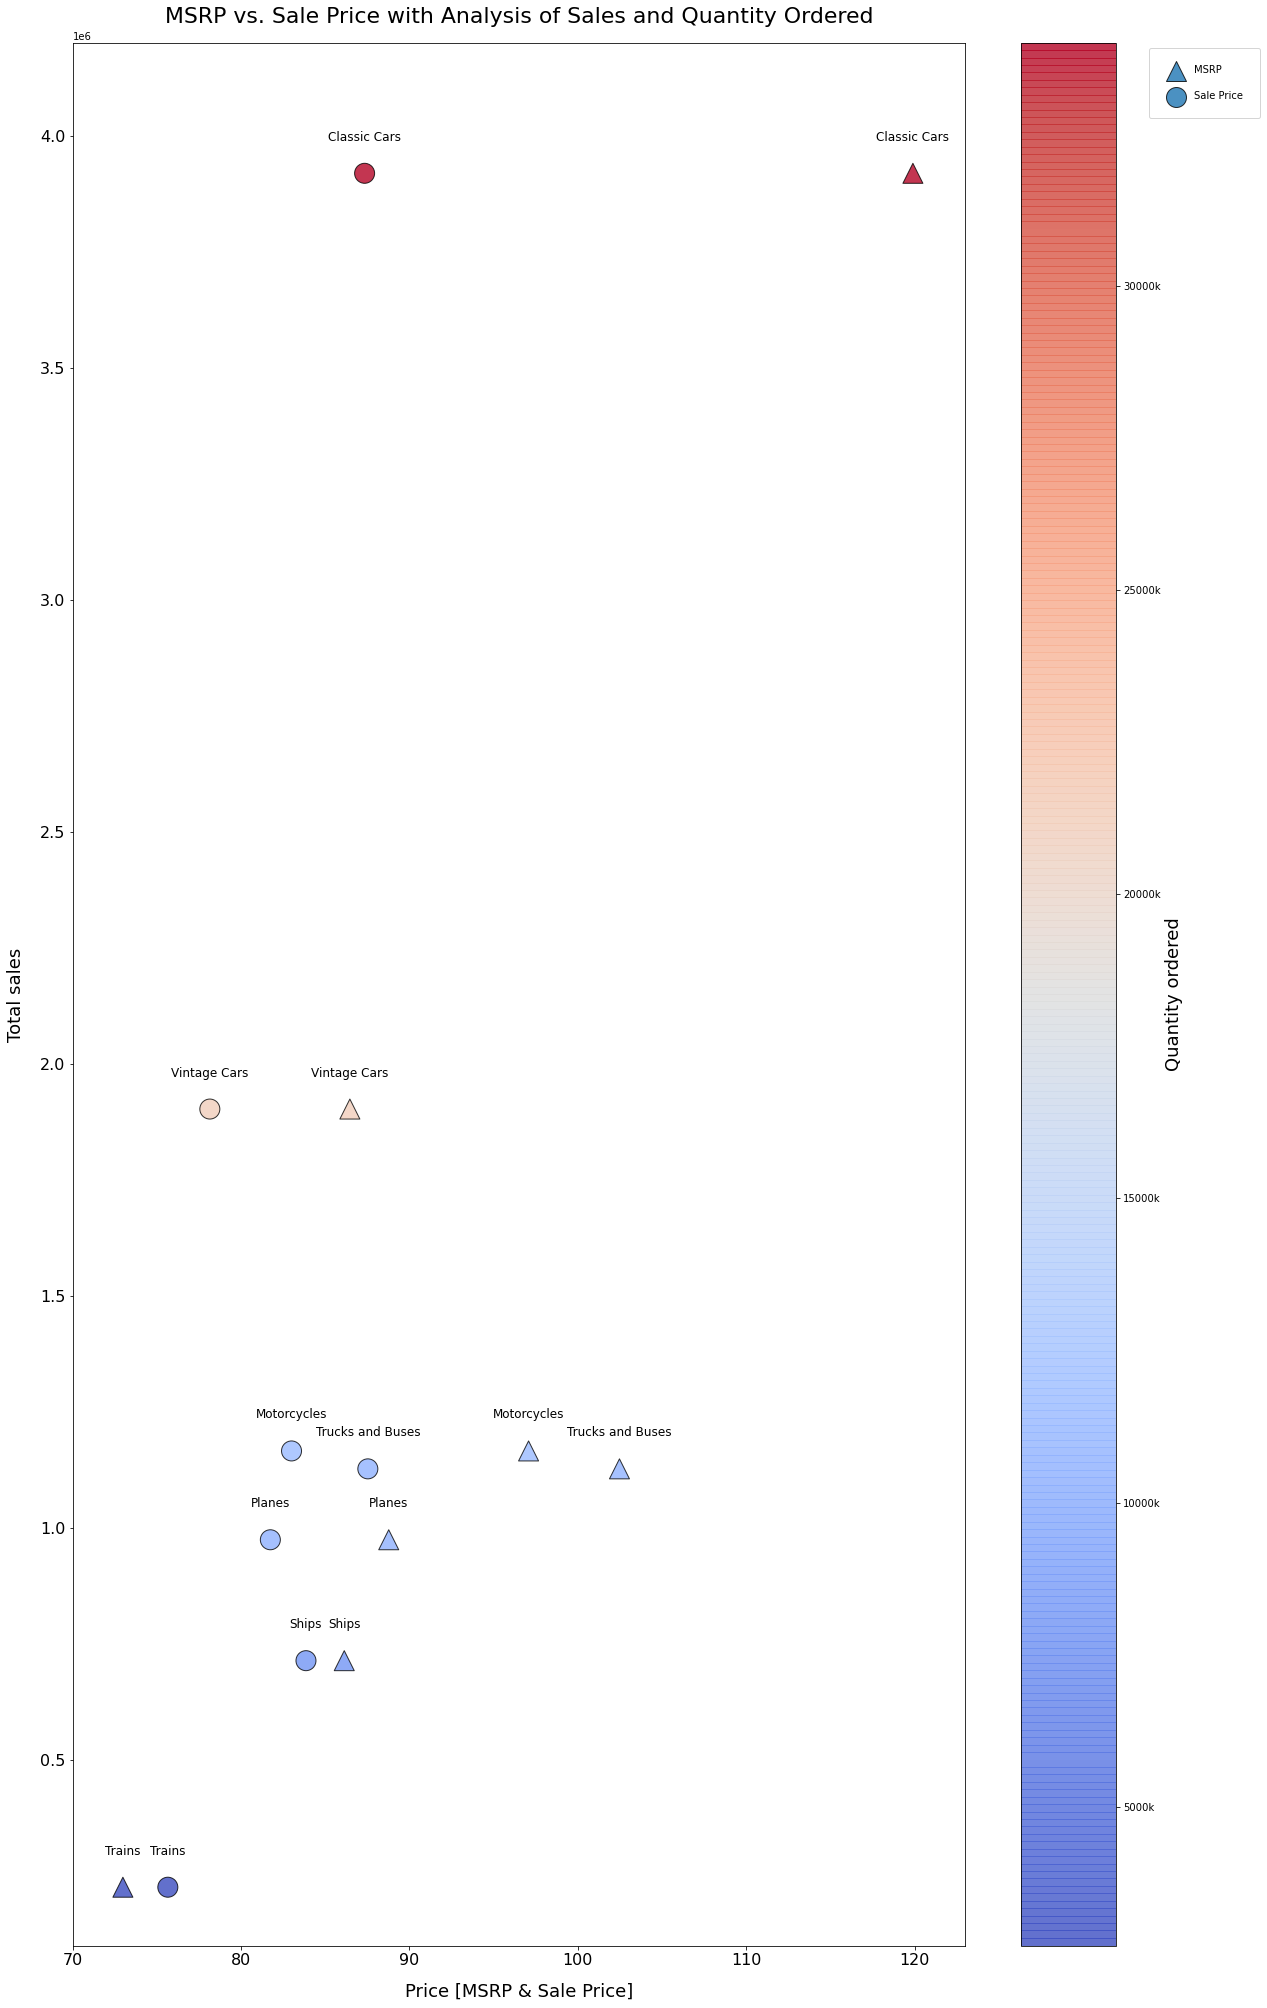

In [23]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.ticker as mticker

# Group by product
df_grouped = df.groupby("PRODUCTLINE").agg({
    "MSRP": "mean",               # Get mean MSRP
    "PRICEEACH": "mean",         # Get mean sale price
    "SALES": "sum",               # Sum of total sales
    "QUANTITYORDERED": "sum"     # Sum of quantity ordered
}).reset_index()

# Reshape the data using melt()
df_melted = df_grouped.melt(
    id_vars=["PRODUCTLINE", "SALES", "QUANTITYORDERED"],
    value_vars=["MSRP", "PRICEEACH"],
    var_name="PRICETYPE",
    value_name="PRICE"
)

# Create figure
fig, ax = plt.subplots(figsize=(20, 35))

# Normalize quantity ordered for color mapping
cmap = plt.cm.coolwarm

print(df_melted.columns)
#print(df_melted["QUANTITYORDERED"].describe())

msrp_df = df_melted[df_melted["PRICETYPE"] == "MSRP"]
print(msrp_df.head(5))

# Scatter plot for MSRP
scatter_msrp = ax.scatter(
    msrp_df['PRICE'], msrp_df['SALES'], 
    c=msrp_df['QUANTITYORDERED'], cmap=cmap,  # Color by quantity
    alpha=0.8, edgecolors="black", marker='^', label="MSRP", s = 400
)

priceeach_df = df_melted[df_melted["PRICETYPE"] == "PRICEEACH"]
print(priceeach_df.head(5))

# Scatter plot for Sale price (PRICEEACH)
scatter_saleprice = ax.scatter(
    priceeach_df['PRICE'], priceeach_df['SALES'], 
    c=priceeach_df['QUANTITYORDERED'], cmap=cmap,  # Color by quantity
    alpha=0.8, edgecolors="black", marker='o', label="Sale Price", s=400 
)

# Add Product name annotations
for i, row in df_melted.iterrows():
    ax.annotate(row["PRODUCTLINE"], 
                (row["PRICE"], row["SALES"] +70000), fontsize=12, color='black', ha='center')

# Labels and Title
ax.set_xlabel("Price [MSRP & Sale Price]", fontsize=18, labelpad=15)
ax.set_ylabel("Total sales", fontsize=18, labelpad=15)
ax.set_title("MSRP vs. Sale Price with Analysis of Sales and Quantity Ordered", fontsize=22, pad=20)

# Increase font size for tick labels
ax.tick_params(axis='both', which='major', labelsize=16) 

# Add color bar for quantity ordered
cbar = plt.colorbar(scatter_msrp, ax=ax)
cbar.set_label("Quantity ordered", fontsize=18)

# Format color bar labels to show 'k'
cbar.ax.yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f"{int(x)}k"))

# Move legend outside
ax.legend(loc="upper left", bbox_to_anchor=(1.2, 1), borderpad=1.7, labelspacing=1.6)

plt.ylim( 100000, 4200000)
plt.xlim( 70, 123)

# Save the figure
#plt.savefig("reports/grouped_bar_chart.jpg", format="jpg", dpi=300, bbox_inches="tight")

# Show the plot
plt.show()


In [24]:
# Pricing strategy line chart
# Filter only valid discounts (Discount > 0)
discount_filtered_df = df[df["DISCOUNT_PCT"] > 0]

# Group by date and product and calculate the average discount percentage
df_grouped_discount = (
    discount_filtered_df.groupby(["ORDERDATE", "PRODUCTLINE"])
    .agg({"DISCOUNT_PCT": "mean"})
    .reset_index()
)

# Group by product, and apply rolling window for discount calculation
df_grouped_discount["ROLLING_AVG_DISCOUNT_%"] = (
    df_grouped_discount.groupby("PRODUCTLINE")["DISCOUNT_PCT"]
    .rolling(window=30) 
    .mean()
    .reset_index(level=0, drop=True)
)

# Create Line Chart
fig = px.line(
    df_grouped_discount, 
    x="ORDERDATE", 
    y="ROLLING_AVG_DISCOUNT_%", 
    color="PRODUCTLINE",
    title="Pricing Strategy: Rolling Average Discount by Product Over Time",  
    labels={"ROLLING_AVG_DISCOUNT_%": "Discount (%)", "ORDERDATE": "Date", "PRODUCTLINE": "Product"},
)

# Customize layout
fig.update_layout(
    xaxis_title="Date",
    xaxis=dict(range=["2003-08-01", "2005-07-31"]),  # Set the date range
    yaxis_title="Rolling average discount (%)",
    legend_title="Product",
    hovermode="x unified",
    width=1000,  # Width in pixels
    height=700,   # Height in pixels
    title = {
        "x": 0.5,  # Center the title
        "xanchor": "center",
        "yanchor": "top"
    }  
)

# Show the figure
fig.show()


In [25]:
# Count deal sizes per date
df_grouped_dealsize = df.groupby(["ORDERDATE", "DEALSIZE"]).size().reset_index(name="COUNT")

# Stacked area chart
fig = px.area(
    df_grouped_dealsize, 
    x="ORDERDATE", 
    y="COUNT", 
    color="DEALSIZE",        
    title="Deal Size Trends Over Time", 
    labels={"ORDERDATE": "Order date", "DEALSIZE": "Deal size", "COUNT": "The number of deals"},
    color_discrete_sequence=["#7C6DAA", "gold", "olive"]
)

# Customize layout
fig.update_layout(
    title = dict(
        x=0.5,  # Center the title
        xanchor="center",
        yanchor="top",
        y=0.95,
        font=dict(
            size=24,
            weight="bold"
        ) 
    ),
    margin=dict(t=110)
)

fig.show()

In [26]:
# Count unique customer names
unique_customers = df["CUSTOMERNAME"].nunique()
total_rows = len(df)

# Check for duplicates
duplicates = df["CUSTOMERNAME"].duplicated().sum()

print(f"Total customers: {unique_customers}")
print(f"Total rows: {total_rows}")
print(f"Duplicate customer names: {duplicates}")

Total customers: 92
Total rows: 2823
Duplicate customer names: 2731


In [27]:
# Count unique order numbers
unique_order_number = df["ORDERNUMBER"].nunique()
total_rows = len(df)

# Check for duplicates
duplicates = df["ORDERNUMBER"].duplicated().sum()

print(f"Total order number: {unique_order_number}")
print(f"Total rows: {total_rows}")
print(f"Duplicate order numbers: {duplicates}")

Total order number: 307
Total rows: 2823
Duplicate order numbers: 2516


In [28]:
# Check that each order includes multiple items
df.groupby("ORDERNUMBER").size().describe()

count    307.000000
mean       9.195440
std        5.024864
min        1.000000
25%        5.000000
50%        9.000000
75%       14.000000
max       18.000000
dtype: float64

In [29]:
# Group customers based on their purchase behavior
# RFM Analysis (Recency, Frequency, Monetary)
# Last date in the dataset
analysis_date = df["ORDERDATE"].max() 

rfm = df.groupby("CUSTOMERNAME").agg(
    Recency=("ORDERDATE", lambda x: (analysis_date - x.max()).days),  
    Frequency=("ORDERNUMBER", "nunique"),     # Count of unique orders per customer
    Monetary=("SALES", "sum")      # Total spending per customer
).reset_index()


# Assuming 'rfm' DataFrame contains 'Recency', 'Frequency', 'Monetary'
fig = px.scatter_3d(
    rfm, 
    x="Recency", 
    y="Frequency", 
    z="Monetary", 
    color="Monetary",  # Color points based on spending
    labels={"Recency": "Recency (Days)<br>(How recently a customer made a purchase)", 
            "Frequency": "Frequency<br>(Orders per customer. <br>How often a customer buys)", 
            "Monetary": 'Monetary Value<br>(Total sales per customer.<br> How much a customer has spent)'},
    title="3D Visualization of Recency, Frequency, and Monetary")

# Increase figure size
fig.update_layout(
    width=1200,  
    height=850,   
    title = {
        "x": 0.5,  # Center the title
        "xanchor": "center",
        "yanchor": "top"
    }
)

fig.show()


In [30]:

# 3 pie charts for RFM show how customers are distributed within each metric.

rfm['Recency_Metric'] = pd.cut(rfm['Recency'], bins=[0, 30, 90, 180, 270, 365, rfm['Recency'].max()],
                                labels=["Very recent customers: 0-30 days", "Recent customers: 31-90 days", 
                                        "Occasional customers: 91-180 days", "Medium-engagement customers: 181-270 days", 
                                        "Low-engagement customers: 271-365 days", "Inactive customers: 365+ days"], 
                                duplicates="drop")

rfm['Frequency_Metric'] = pd.cut(rfm['Frequency'], bins = [1, 2, 4, 6, 26], 
                                 labels=["Rare buyers: 1-2 orders", "Occasional buyers: 3-4 orders", 
                                         "Frequent buyers: 5-6 orders", "Very frequent buyers: 7+ orders"])

rfm['Monetary_Metric'] = pd.cut(rfm['Monetary'], bins=[0, 200000, 400000, 600000, 800000, rfm['Monetary'].max()], 
                                 labels=["0-200k", "200k-400k", "400k-600k", "600k-800k", "800k+"], duplicates="drop")

# Create summary for each metric
recency_counts = rfm['Recency_Metric'].value_counts().reset_index()
recency_counts.columns = ['Category', 'Count']

frequency_counts = rfm['Frequency_Metric'].value_counts().reset_index()
frequency_counts.columns = ['Category', 'Count']

monetary_counts = rfm['Monetary_Metric'].value_counts().reset_index()
monetary_counts.columns = ['Category', 'Count']

# Generate three pie charts
fig1 = px.pie(recency_counts, names='Category', values='Count', title="Customer Recency Distribution", 
              color_discrete_sequence=['lightgreen', '#F4A7A8', '#5872E6', "#ADBBB0", "#97664E", "gold"])
fig2 = px.pie(frequency_counts, names='Category', values='Count', title="Customer Frequency Distribution", 
             color_discrete_sequence=["#C2C6B3", "#68703E", "#B8A3B0", "#4C7588"])
fig3 = px.pie(monetary_counts, names='Category', values='Count', title="Customer Monetary Distribution",
             color_discrete_sequence=["#5B0868", "#97B5C9","#ECCC09","#DC0863", "#3FBF63"])

fig1.update_layout(margin=dict(t=100), title=dict(y=0.95), legend_title="Categories:")
fig2.update_layout(margin=dict(t=100), title=dict(y=0.95), legend_title="Categories:")
fig3.update_layout(margin=dict(t=150), title=dict(y=0.95), legend_title="Categories (How much a customer has spent):")

# Show figures
fig1.show()


In [31]:
fig2.show()

In [32]:
fig3.show()